In [1]:
"""Headers"""

from __future__ import print_function
from PIL import Image
import os
import os.path
import numpy as np
import sys
import math
import time
import pickle
import numpy.random

import torch.utils.data as data
from torchvision.datasets.utils import download_url, check_integrity

import csv
import copy
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
import sys
import torch
import torch.utils.data
import torchvision
import torchvision.transforms as transforms

import cv2

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from model import *
from datasetloader import *
from boxplot import *
from coco_dict import *

In [2]:
# ---------------------

train_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                ])
test_transform = None
# ---------------------

boxParams = [[8, 0.5], [8, 1.], [8, 2], [16, 0.5], [16, 1.], [16, 2.], [32, 0.5], [32, 1.], [32, 2.]]

TRAIN_BS = 1

trainset = DataSet(fold="train", transform=train_transform, max_img = 100, boxParams = boxParams)

print(trainset.data.shape)

trainLoader = torch.utils.data.DataLoader(trainset, batch_size=TRAIN_BS,
                                          shuffle=True, num_workers=0)
print("Ttrain set size: "+str(len(trainset)))

valset = DataSet(fold="valid", transform=train_transform, max_img = 100, boxParams = boxParams)

valLoader = torch.utils.data.DataLoader(valset, batch_size=TRAIN_BS,
                                          shuffle=True, num_workers=0)
print("Val set size: "+str(len(valset)))

(41,)
Ttrain set size: 41
Val set size: 35


In [3]:
IS_GPU = False

boxParams = torch.tensor([[8, 0.5], [8, 1.], [8, 2], [16, 0.5], [16, 1.], [16, 2.], [32, 0.5], [32, 1.], [32, 2.]])

rcnn = PreTrainedResNet(feature_extracting = False, model = "resnet18")

if IS_GPU:
    rcnn = PreTrainedResNet(feature_extracting = False, model = "resnet18", IS_GPU = True)
    rcnn = rcnn.cuda()

rcnn.train(trainLoader, valLoader, boxParams, NUM_EPOCHS = 4)

Text(0.5, 1.0, 'Validation Set Loss')

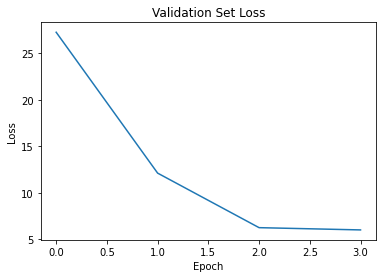

In [4]:
plt.plot(rcnn.valLoss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Validation Set Loss")

Text(0.5, 1.0, 'Train Set Loss')

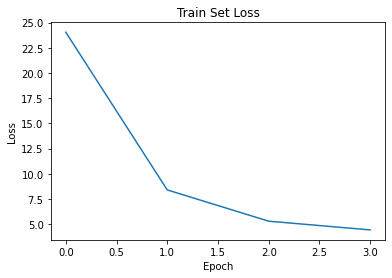

In [5]:
plt.plot(rcnn.trainLoss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train Set Loss")

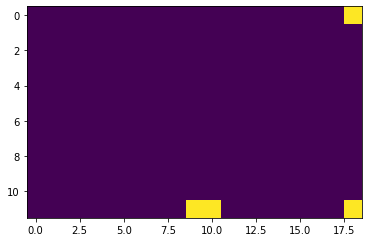

torch.Size([12, 256, 10, 10])


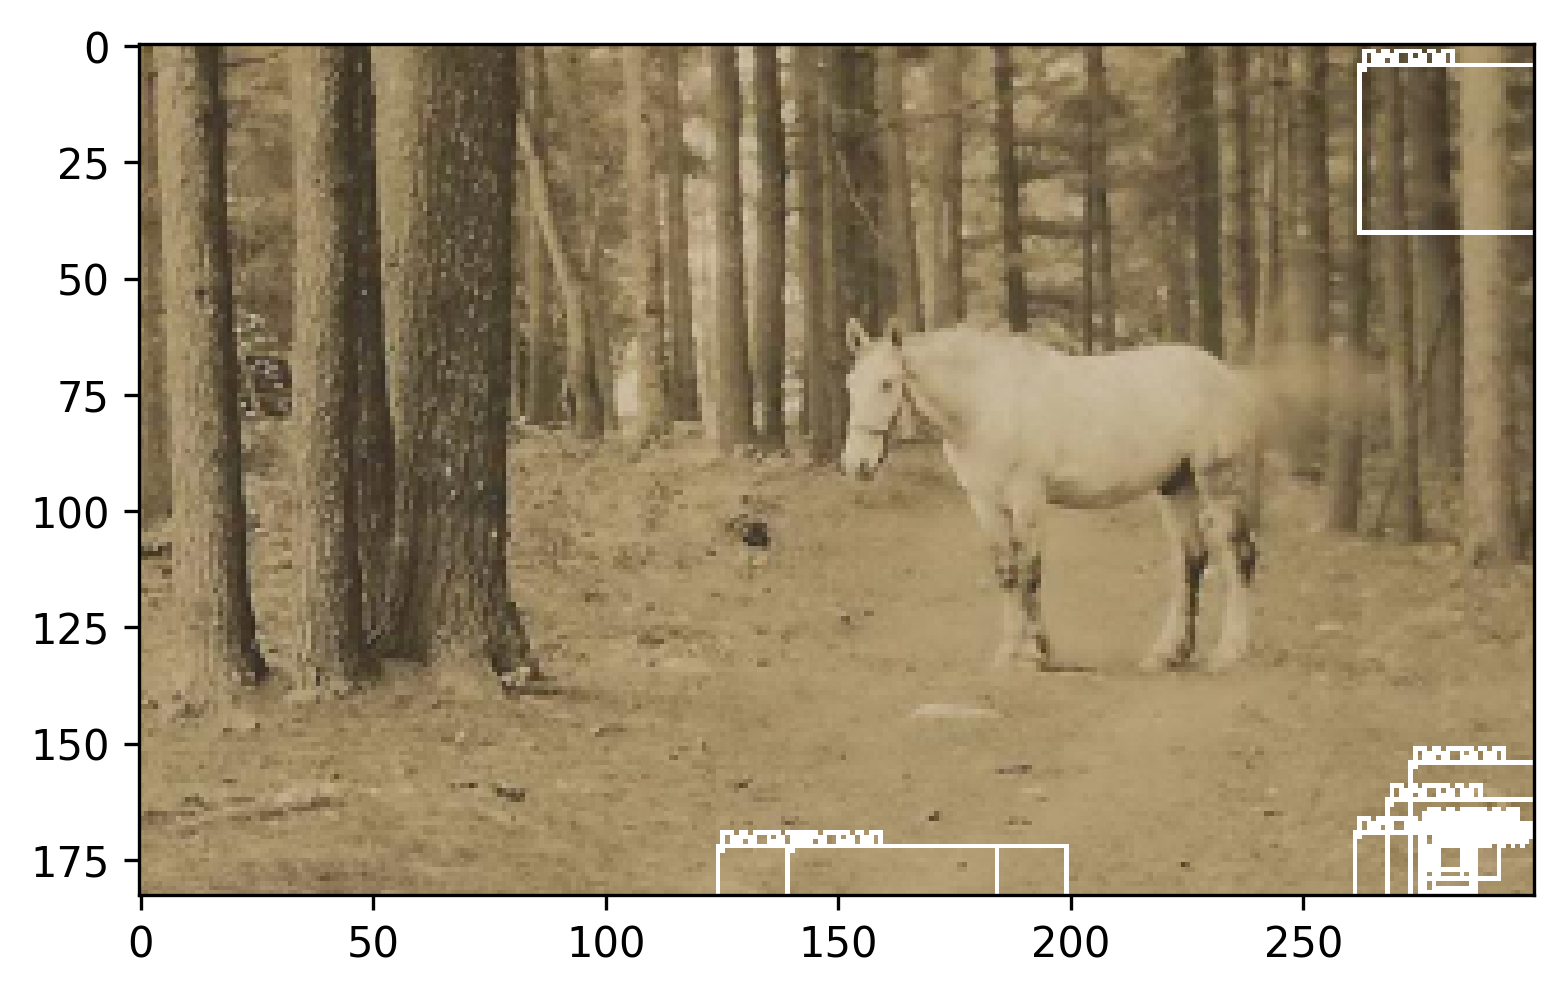

In [6]:
it = iter(trainLoader)
img, target = it.next()
rcnn.predict(img, cutoff = 0.2)

In [18]:
torch.__version__

'1.8.1+cpu'